# Schmitt Trigger using a Bipolar Transistor

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import (
    Circuit, SubCircuitFactory
)
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.WaveForm import OperatingPoint

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Objective

The purpose of this section is to study Schmitt triggers implemented using bipolar transistors. We begin by analyzing the circuit diagram and deriving the equations that describe its behavior. Next, we perform simulations to illustrate and validate these results. Finally, the last part discusses possible improvements to the circuit.

This circuit is not very easy to understand. Creating hysteresis with an operational amplifier is much simpler by comparison.

## Circuit

The circuit is shown in [](#Transis-circuit). It consists of **two bipolar transistors** and **six resistors**.
Each component plays a role—sometimes critical—in the final calculations and in determining the switching thresholds.
The goal of the next sections is to derive the **key equations** that explain how the circuit operates.

```{figure} ./images/Transis-circuit.svg
:name: Transis-circuit
:align: center
:width: 400px

Schmitt trigger circuit implemented with bipolar transistors
```

## Equation

## Demonstration

Two operating conditions must be analyzed: when transistor $Q_1$ is **cut off** and when $Q_1$ is **conducting**.

### Case 1 – $Q_1$ Cut Off

#### Voltage Analysis

When transistor $Q_1$ is cut off, the base–emitter junction is not forward biased:

$$
V_\text{in} - V_E < 0.7~\text{V}
$$

As a consequence, no current flows through $Q_1$ :

$$
I_{E1} = I_{C1} = 0
$$

The circuit can therefore be reduced to a purely resistive network composed of ( R_1 ), ( R_A ), and ( R_B ), as shown in Figure [](#Q1_bloque_pond_resistance).

```{figure} ./images/Q1_bloque_pond_resistance.svg
:name: Q1_bloque_pond_resistance
:align: center
:width: 400px

Equivalent resistive divider when transistor $Q_1$ is cut off
```

Since no current enters the base of $Q_1$, all the current flowing through $R_1$ continues through $R_A$ and $R_B$.
The circuit is therefore equivalent to a **voltage divider**.

The node voltages can be written as:

$$
V_A = \frac{R_A + R_B}{R_1 + R_A + R_B} \cdot V_\text{ref}
$$

$$
V_B = \frac{R_B}{R_1 + R_A + R_B} \cdot V_\text{ref}
$$

The emitter voltage $V_E$ is obtained from node $B$, taking into account the base–emitter voltage of transistor $Q_2$:

$$
V_E = V_B - V_{\text{BE2}}
$$

For transistor $Q_1$ to start conducting, its base–emitter junction must become forward biased:

$$
V_\text{in} > V_E + V_{\text{BE1}}
$$

Substituting $V_E$:

$$
V_\text{in} > V_B - V_{\text{BE2}} + V_{\text{BE1}}
$$

Assuming $V_\text{BE1} \approx V_\text{BE2}$, the condition simplifies to:

$$
V_\text{in} > V_B
$$

The switching threshold is therefore given by:

$$
V_\text{in} > V_B
$$

$$
V_\text{in} > \frac{R_B}{R_1 + R_A + R_B} \cdot V_\text{ref}
$$

#### Current Analysis

The emitter current through resistor $R_E$ is:

$$
I_E = \frac{V_E}{R_E}
$$

Assuming the emitter current of $Q_1$ is negligible compared to $I_E$, the collector current of transistor $Q_2$ can be approximated as:

$$
I_{C2} = I_E \frac{\beta}{\beta + 1}
$$

### Output Voltage

The voltage drop across resistor $R_2$ is:

$$
V_{R2} = I_{C2} \cdot R_2
$$

Thus, the output voltage when the system is in the **low state** is:

$$
V_\text{out} = V_\text{ref} - V_{R2}
$$

### Case 2 – $Q_1$ Conducting

In this operating mode, the input voltage exceeds the switching threshold:

$$
V_\text{in} > V_B
$$

The emitter voltage of $Q_1$ is then given by:

$$
V_E = V_\text{in} - V_{\text{BE1}}
$$

The emitter current becomes:

$$
I_E = \frac{V_E}{R_E}
$$

At this point, transistor $Q_1$ is **saturated**.
Since $V_A > V_\text{in}$, transistor $Q_1$ can be modeled as a saturated switch.

Under this assumption:

$$
V_A \approx V_E \approx V_\text{in} - V_{BC}
$$

The voltage across resistor $R_1$ is therefore:

$$
V_{R1} = V_\text{ref} - V_A
$$

The voltage at node $B$ is determined by the divider formed by $R_A$ and $R_B$:

$$
V_B = \frac{R_B}{R_A + R_B} \cdot V_A
$$

Since node $B$ is directly connected to the output, the output voltage is:

$$
V_\text{out} = V_B
$$

```{danger}
Transistor $Q_2$ must not enter saturation.
If $Q_2$ saturates (i.e. $V_{BC} > 0.7 \ \text{V}$), the output voltage will follow the input voltage, and the trigger behavior will be lost.
```

Pour la valeur de transition, il faut que le transistor Q2, passe de passant à bloqué. Donc cela veut dire que sa valeur de la jonction $V_{BC1} > 0.7 \text{V}$.

Donc d'après le montage il est possible d'écrire que :

$$V_{BC1} > 0.7 \ \text{V}$$
$$V_{E} - V_{B} > 0.7 \ \text{V}$$

Ainsi, développement les formule il est possible d'écrire les équations suivants :

$$(V_\text{in} - V_{\text{BE1}}) - \frac{R_B}{R_A + R_B} \cdot V_A > 0.7 \ \text{V}$$
$$(V_\text{in} - V_{\text{BE1}}) - \frac{R_B}{R_A + R_B} \cdot (V_\text{in} - V_{BC}) > 0.7 \ \text{V}$$

Or on considère dans cette étude que toutes les valeurs des jonctions sont les mêmes et donc que $V_{\text{BE1}} \approx V_{BC}$ donc il est possible d'écrire 

$$(V_\text{in} - V_{BC}) - \frac{R_B}{R_A + R_B} \cdot (V_\text{in} - V_{BC}) > 0.7 \ \text{V}$$
$$(V_\text{in} - V_{BC}) (1 - \frac{R_B}{R_A + R_B}) > 0.7 \ \text{V}$$

## Switching Thresholds Summary

| Threshold | Condition on (V_\text{in}) | Expression | 
| ----------| -------------------------- |----------- |
| **Low threshold** $V_{T-}$  | $Q_1$ turns **off**  | $V_{T-} = \frac{R_B}{R_1 + R_A + R_B} \cdot V_\text{ref}$  | 
| **High threshold** $V_{T+}$ | $Q_1$ turns **on**   | $V_{T+} = (V_\text{in} - V_{BC}) (1 - \frac{R_B}{R_A + R_B}) + 0.7$  | 

## Electronic Circuit

The circuit shown in [](#Transis-circuit-space) is very similar to the initial circuit presented in [](#Transis-circuit).

From this point, the objective is to design a functional circuit and analyze its behavior in detail.

```{figure} ./images/Transis-circuit-space.svg
:name: Transis-circuit-space
:align: center
:width: 400px

Schmitt trigger circuit implemented with bipolar transistors (SPACE version)
```

In [3]:
# =============================================================
# Circuit Definition : Montage Hysteresis with Transistor (BJT)
# =============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Hysteresis with Transistor')

# Include required component libraries
circuit.include("lib/bjt.lib")

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_ref       = 4  @ u_V  # Reference supply voltage [V]
f           = 2         # fréquence [Hz]
V_offset    = 0         # offset DC
V_amplitude = 8         # amplitude du signal sin
delay       = 0         # delay of the system  

circuit.V('ref', 'vref', circuit.gnd, V_ref)
circuit.SinusoidalVoltageSource(
    'in', 'vin', circuit.gnd,
    offset=V_offset @ u_V,
    amplitude=V_amplitude @ u_V,
    frequency=f @ u_Hz,
    delay=delay @ u_s
)


# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1.00 @ u_kOhm           # R1 [Ω]
R_2 = 1.00 @ u_kOhm           # R2 [Ω]
R_A = 220 @ u_Ohm             # RA [Ω]
R_B = 800 @ u_Ohm             # RB [Ω]
R_E = 330 @ u_Ohm             # RE [Ω]

circuit.R('1', 'vref', 'A',      R_1)
circuit.R('2', 'vref', 'vout',   R_2)
circuit.R('A', 'A', 'B',         R_A)
circuit.R('B', 'B', circuit.gnd, R_B)
circuit.R('E', 'E', circuit.gnd, R_E)


# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT(1, 'A',    'vin', 'E', model='2N2222A')
circuit.BJT(2, 'vout', 'B',   'E', model='2N2222A');

# ------------------------------------------------------------
# Emitter Load
# ------------------------------------------------------------
#R_emitter = 820 @ u_Ohm           # Emitter resistor [Ω]

#circuit.R('l', 'vout', circuit.gnd, R_emitter);

# ============================================================
# End of Circuit Definition
# ============================================================

In [4]:
# ------------------------------------------------------------
# Transient Simulation
# ------------------------------------------------------------
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

analysis = simulator.transient(
    step_time=1@u_ms,    # pas de temps : 1 ms (à ajuster si besoin)
    end_time=2@u_s       # durée totale : 2 secondes
)

# ============================================================
# End of Transient Simulation
# ============================================================

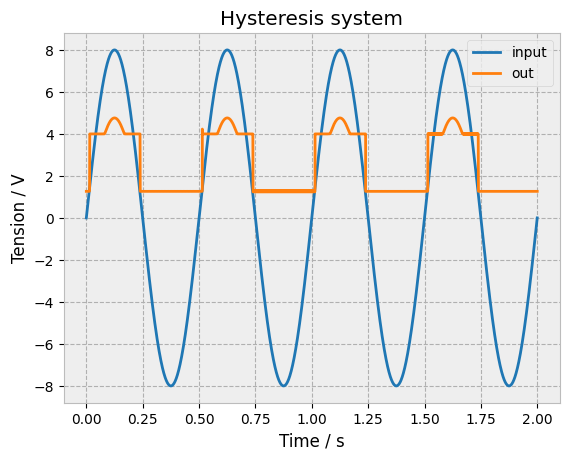

In [5]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================
plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title(
    "Hysteresis system"
)

# Line ref
#plt.axhline(6, color="black")
#plt.axhline(-6, color="black")

# Load curve
plt.plot(analysis.time, analysis['vin'], label='input')
plt.plot(analysis.time, analysis['vout'], label='out')



# Axis labels
plt.xlabel('Time / s')
plt.ylabel('Tension / V')

# Legend
plt.legend()

# Display the plot
plt.show()

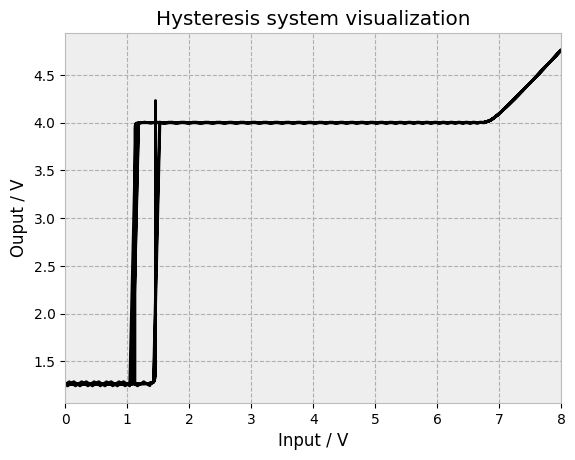

In [6]:
vin = analysis['vin']
vout = analysis['vout']

# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title(
    "Hysteresis system visualization"
)

# Load curve
plt.plot(vin, vout, "black")

# Axis labels
plt.xlabel('Input / V')
plt.ylabel('Ouput / V')
plt.xlim(0, 8)

# Display the plot
plt.show()

## Comparaison entre le calcul thérorique & la simulation

### Initalisations paramètres

In [7]:
# Initialisation des variables
# ----------------------------

# ---- Tension
Vref = 4

# ---- Résistance
R1 = 1000
R2 = 1000
RA = 220
RB = 800
RE = 330

# ---- Paramètre transistor
Beta = 100
TranBE = 0.7

### Initalisation fonction

In [8]:
"""
Trigger model – analytical equations

This module provides helper functions to compute node voltages,
currents, and output levels for a BJT-based trigger circuit.

Two operating regions are considered:
    1) Q1 cut off
    2) Q1 conducting (saturated)
"""

# ============================================================
# Case 1 – Q1 cut off
# ============================================================

def Va_q1_off(RA: float, RB: float, R1: float, Vref: float) -> float:
    """
    Node A voltage when Q1 is cut off (pure resistive divider).
    """
    return (RA + RB) / (R1 + RA + RB) * Vref


def Vb_q1_off(RA: float, RB: float, R1: float, Vref: float) -> float:
    """
    Node B voltage when Q1 is cut off.
    """
    return RB / (R1 + RA + RB) * Vref


def Ve_q1_off(VB: float, VBE2: float) -> float:
    """
    Emitter voltage of Q2 when Q1 is cut off.
    """
    return VB - VBE2


def Ie(VE: float, RE: float) -> float:
    """
    Emitter current through RE.
    """
    return VE / RE


def Ic_from_Ie(IE: float, beta: float) -> float:
    """
    Collector current approximation:
    Ic = Ie * beta / (beta + 1)
    """
    return IE * beta / (beta + 1)


def Vout_low(Vref: float, VR2: float) -> float:
    """
    Output voltage in low state.
    Assumes infinite load impedance.
    """
    return Vref - VR2

def Vout_low2(RA: float, RB: float, R1: float, R2:float, RE:float, Vref:float, beta:float, VBE2:float) -> float:
    """
    Output voltage in low state.
    Assumes infinite load impedance.
    """
    VB  = Vb_q1_off(RA, RB, R1, Vref)
    VE  = Ve_q1_off(VB, VBE2)
    IE  = Ie(VE, RE)
    IC = Ic_from_Ie(IE, beta)
    VR2 = IC * R2
    
    return Vref - VR2

# ============================================================
# Case 2 – Q1 conducting (saturated)
# ============================================================
def Ve_q1_on(Vin: float, VBE1: float) -> float:
    """
    Emitter voltage of Q1 when conducting.
    """
    return Vin - VBE1


def Va_q1_on(Vin: float, VBC: float) -> float:
    """
    Node A voltage when Q1 is saturated.
    """
    return Vin - VBC


def VR1(Vref: float, VA: float) -> float:
    """
    Voltage drop across R1.
    """
    return Vref - VA


def Vb_q1_on(RA: float, RB: float, VA: float) -> float:
    """
    Node B voltage when Q1 is conducting.
    """
    return RB / (RA + RB) * VA


def Vout_high(VB: float, VE: float) -> float:
    """
    Output voltage in high state.
    Q2 must NOT be saturated.
    """
    return VB - VE

### Cas Q1 bloqué

In [9]:
# =============================================================
# Circuit Definition : Montage Hysteresis with Transistor (BJT)
# =============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Hysteresis with Transistor')

# Include required component libraries
circuit.include("lib/bjt.lib")

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_ref       = 4  @ u_V  # Reference supply voltage [V]
V_amplitude = 0  @ u_V  # amplitude du signal sin

circuit.V('ref', 'vref', circuit.gnd, V_ref)
circuit.V('in', 'vin', circuit.gnd, V_amplitude)

# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1.00 @ u_kOhm           # R1 [Ω]
R_2 = 1.00 @ u_kOhm           # R2 [Ω]
R_A = 220 @ u_Ohm             # RA [Ω]
R_B = 800 @ u_Ohm             # RB [Ω]
R_E = 330 @ u_Ohm             # RE [Ω]

circuit.R('1', 'vref', 'A',      R_1)
circuit.R('2', 'vref', 'vout',   R_2)
circuit.R('A', 'A', 'B',         R_A)
circuit.R('B', 'B', circuit.gnd, R_B)
circuit.R('E', 'E', circuit.gnd, R_E)

circuit.RE.minus.add_current_probe(circuit)

# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT(1, 'A',    'vin', 'E', model='2N2222A')
circuit.BJT(2, 'vout', 'B',   'E', model='2N2222A');

#circuit.Q1.collector.add_current_probe(circuit)

# ============================================================
# End of Circuit Definition
# ============================================================

# ------------------------------------------------------------
# Simulator Initialization
# ------------------------------------------------------------
simulator = circuit.simulator(
    temperature=25,            # Simulation temperature [°C]
    nominal_temperature=25     # Nominal device temperature [°C]
)

# ------------------------------------------------------------
# Run Operating Point Simulation
# ------------------------------------------------------------
analysis = simulator.operating_point()

In [10]:
# ============================================================
# Analytical computation (Q1 cut off)
# ============================================================

VA_analytical = Va_q1_off(RA, RB, R1, Vref)
VB_analytical = Vb_q1_off(RA, RB, R1, Vref)
VE_analytical = Ve_q1_off(VB_analytical, TranBE)
VO_analytical = Vout_low2(RA, RB, R1, R2, RE, Vref, Beta, TranBE)
# ============================================================
# Simulation results
# ============================================================

VA_simulation = float(analysis['a'][0])
VB_simulation = float(analysis['b'][0])
VE_simulation = float(analysis['e'][0])
VO_simulation = float(analysis['vout'][0])

# ============================================================
# Error computation
# ============================================================

VA_abs_error = abs(VA_simulation - VA_analytical)
VB_abs_error = abs(VB_simulation - VB_analytical)
VE_abs_error = abs(VE_simulation - VE_analytical)
VO_abs_error = abs(VO_simulation - VO_analytical)

VA_rel_error = VA_abs_error / VA_analytical * 100
VB_rel_error = VB_abs_error / VB_analytical * 100
VE_rel_error = VB_abs_error / VE_analytical * 100
VO_rel_error = VO_abs_error / VO_analytical * 100

In [11]:
# ============================================================
# Comparison report
# ============================================================
print("Node voltage comparison (Q1 cut off)")
print("------------------------------------")

print(f"VA (Analytical)   : {VA_analytical:.3f} V")
print(f"VA (Simulation)   : {VA_simulation:.3f} V")
print(f"VA Error          : {VA_abs_error:.3f} V  ({VA_rel_error:.3} %)\n")

print(f"VB (Analytical)   : {VB_analytical:.3f} V")
print(f"VB (Simulation)   : {VB_simulation:.3f} V")
print(f"VB Error          : {VB_abs_error:.3f} V  ({VB_rel_error:.3f} %)\n")

print(f"VE (Analytical)   : {VE_analytical:.3f} V")
print(f"VE (Simulation)   : {VE_simulation:.3f} V")
print(f"VE Error          : {VE_abs_error:.3f} V  ({VE_rel_error:.3} %)\n")

print(f"VO (Analytical)   : {VO_analytical:.3f} V")
print(f"VO (Simulation)   : {VO_simulation:.3f} V")
print(f"VO Error          : {VO_abs_error:.3f} V  ({VO_rel_error:.3} %)\n")

Node voltage comparison (Q1 cut off)
------------------------------------
VA (Analytical)   : 2.020 V
VA (Simulation)   : 2.013 V
VA Error          : 0.007 V  (0.334 %)

VB (Analytical)   : 1.584 V
VB (Simulation)   : 1.576 V
VB Error          : 0.008 V  (0.519 %)

VE (Analytical)   : 0.884 V
VE (Simulation)   : 0.908 V
VE Error          : 0.024 V  (0.931 %)

VO (Analytical)   : 1.347 V
VO (Simulation)   : 1.265 V
VO Error          : 0.082 V  (6.08 %)



Les erreurs dans l'ensemble sont relativement faible. Donc les calculers analytiques permettent d'avoir une bonne vision des résultats de sortie. 

### Cas Q2 passant

In [12]:
# =============================================================
# Circuit Definition : Montage Hysteresis with Transistor (BJT)
# =============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Hysteresis with Transistor')

# Include required component libraries
circuit.include("lib/bjt.lib")

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_ref       = 4.0  @ u_V  # Reference supply voltage [V]
V_amplitude = 3.5  @ u_V  # amplitude du signal sin

circuit.V('ref', 'vref', circuit.gnd, V_ref)
circuit.V('in', 'vin', circuit.gnd, V_amplitude)

# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1.00 @ u_kOhm           # R1 [Ω]
R_2 = 1.00 @ u_kOhm           # R2 [Ω]
R_A = 220 @ u_Ohm             # RA [Ω]
R_B = 800 @ u_Ohm             # RB [Ω]
R_E = 330 @ u_Ohm             # RE [Ω]

circuit.R('1', 'vref', 'A',      R_1)
circuit.R('2', 'vref', 'vout',   R_2)
circuit.R('A', 'A', 'B',         R_A)
circuit.R('B', 'B', circuit.gnd, R_B)
circuit.R('E', 'E', circuit.gnd, R_E)

circuit.RE.minus.add_current_probe(circuit)

# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT(1, 'A',    'vin', 'E', model='2N2222A')
circuit.BJT(2, 'vout', 'B',   'E', model='2N2222A');

#circuit.Q1.collector.add_current_probe(circuit)

# ============================================================
# End of Circuit Definition
# ============================================================

# ------------------------------------------------------------
# Simulator Initialization
# ------------------------------------------------------------
simulator = circuit.simulator(
    temperature=25,            # Simulation temperature [°C]
    nominal_temperature=25     # Nominal device temperature [°C]
)

# ------------------------------------------------------------
# Run Operating Point Simulation
# ------------------------------------------------------------
analysis = simulator.operating_point()

In [13]:
# ============================================================
# Analytical computation (Q1 cut off)
# ============================================================
Vin = 3.0


VA_analytical = Va_q1_on(Vin, TranBE)
VB_analytical = Vb_q1_on(RA, RB, VA_analytical)
VE_analytical = Ve_q1_on(Vin, TranBE)
VO_analytical = Vref
# ============================================================
# Simulation results
# ============================================================

VA_simulation = float(analysis['a'][0])
VB_simulation = float(analysis['b'][0])
VE_simulation = float(analysis['e'][0])
VO_simulation = float(analysis['vout'][0])

# ============================================================
# Error computation
# ============================================================

VA_abs_error = abs(VA_simulation - VA_analytical)
VB_abs_error = abs(VB_simulation - VB_analytical)
VE_abs_error = abs(VE_simulation - VE_analytical)
VO_abs_error = abs(VO_simulation - VO_analytical)

VA_rel_error = VA_abs_error / VA_analytical * 100
VB_rel_error = VB_abs_error / VB_analytical * 100
VE_rel_error = VB_abs_error / VE_analytical * 100
VO_rel_error = VO_abs_error / VO_analytical * 100

In [14]:
# ============================================================
# Comparison report
# ============================================================
print("Node voltage comparison (Q1 cut off)")
print("------------------------------------")

print(f"VA (Analytical)   : {VA_analytical:.3f} V")
print(f"VA (Simulation)   : {VA_simulation:.3f} V")
print(f"VA Error          : {VA_abs_error:.3f} V  ({VA_rel_error:.3} %)\n")

print(f"VB (Analytical)   : {VB_analytical:.3f} V")
print(f"VB (Simulation)   : {VB_simulation:.3f} V")
print(f"VB Error          : {VB_abs_error:.3f} V  ({VB_rel_error:.3f} %)\n")

print(f"VE (Analytical)   : {VE_analytical:.3f} V")
print(f"VE (Simulation)   : {VE_simulation:.3f} V")
print(f"VE Error          : {VE_abs_error:.3f} V  ({VE_rel_error:.3} %)\n")

print(f"VO (Analytical)   : {VO_analytical:.3f} V")
print(f"VO (Simulation)   : {VO_simulation:.3f} V")
print(f"VO Error          : {VO_abs_error:.3f} V  ({VO_rel_error:.3} %)\n")

Node voltage comparison (Q1 cut off)
------------------------------------
VA (Analytical)   : 2.300 V
VA (Simulation)   : 2.661 V
VA Error          : 0.361 V  (15.7 %)

VB (Analytical)   : 1.804 V
VB (Simulation)   : 2.087 V
VB Error          : 0.283 V  (15.699 %)

VE (Analytical)   : 2.300 V
VE (Simulation)   : 2.658 V
VE Error          : 0.358 V  (12.3 %)

VO (Analytical)   : 4.000 V
VO (Simulation)   : 4.000 V
VO Error          : 0.000 V  (1.48e-07 %)



In this case, the error is no longer negligible; however, it remains approximately constant at around $0.3 \text{V}$.
At this stage, the exact origin of this error has not yet been identified.

## Transition Values

The purpose of this section is to compare the transition values obtained from simulations with those derived from analytical calculations.

In [38]:
Transition1 = Vin - RB / (R1 + RA + RB) * Vref 
Transition2 = (Vin - TranBE) * (1 - RB / (RA + RB)) + 0.7
Saturation  = (RA + RB) / RB * Vref + 0.7*2

print(f"Value transision 1 : {Transition1:.2f} V")
print(f"Value transision 2 : {Transition2:.2f} V")
print(f"Value limite Vin   : {Saturation} V")

Value transision 1 : 1.42 V
Value transision 2 : 1.20 V
Value limite Vin   : 6.5 V


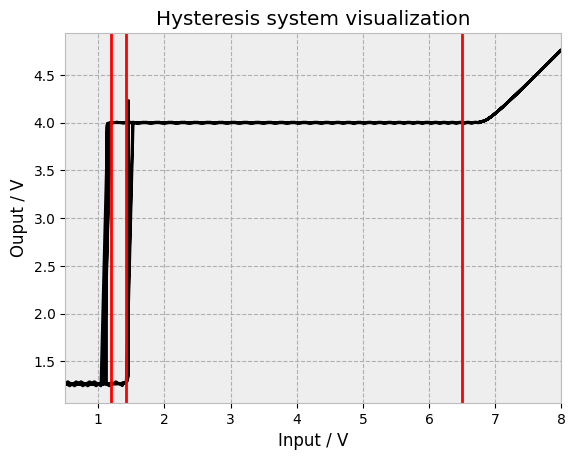

In [39]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title(
    "Hysteresis system visualization"
)

# Load curve
plt.plot(vin, vout, "black")
plt.axvline(Transition1, color="red")
plt.axvline(Transition2, color="red")
plt.axvline(Saturation, color="red")


# Axis labels
plt.xlabel('Input / V')
plt.ylabel('Ouput / V')

# Axis limit
plt.xlim(.5, 8)

# Display the plot
plt.show()

## Limitation

Throughout this analysis, the output load is assumed to be infinite. This assumption is necessary because if the load resistance is not infinite—or at least not much larger than $R_2$ a voltage drop will occur across the load resistance.

As a result, the output voltage will no longer match the analytical expressions derived in this study.
For this reason, it is strongly recommended to insert a **buffer stage** between this type of trigger and the subsequent stages of the circuit.


## Writing Matrix

| Author | Reviewer | Approver | Section | Date 1 | Date 2 | Date 3 | General Remarks |
|--------|----------|----------|---------|--------|--------|--------|------------------|
| Sacha  | /        | /        | Entire document | 2026-01-01 | / | / | Initial draft of the full document |